In [1]:
!pip install lifelines

     |████████████████████████████████| 349 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=e7a21394fe5ded231c2ccb22ba7ec0d0d1ce90ac8183f48703d36a38c49d18c2
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## **Importing Necessary Libraries**

In [18]:
import pandas as pd
import lifelines
from matplotlib import pyplot as plt

## **Importing Data**

In [5]:
unemp_data = pd.read_csv('survival_unemployment.csv')
unemp_data 

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


## **Intial Analysis**

In [6]:
unemp_data.shape

(3343, 5)

In [7]:
unemp_data.dtypes

spell        int64
event        int64
ui           int64
logwage    float64
age          int64
dtype: object

In [8]:
unemp_data.isna().sum()

spell      0
event      0
ui         0
logwage    0
age        0
dtype: int64

In [10]:
unemp_data['ui'].value_counts()

1    1848
0    1495
Name: ui, dtype: int64

In [11]:
unemp_data.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [13]:
unemp_data["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [14]:
# Spell is referring to time 
T = unemp_data.spell

In [16]:
# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T,event_observed=unemp_data.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3343 total observations, 2270 right-censored observations>

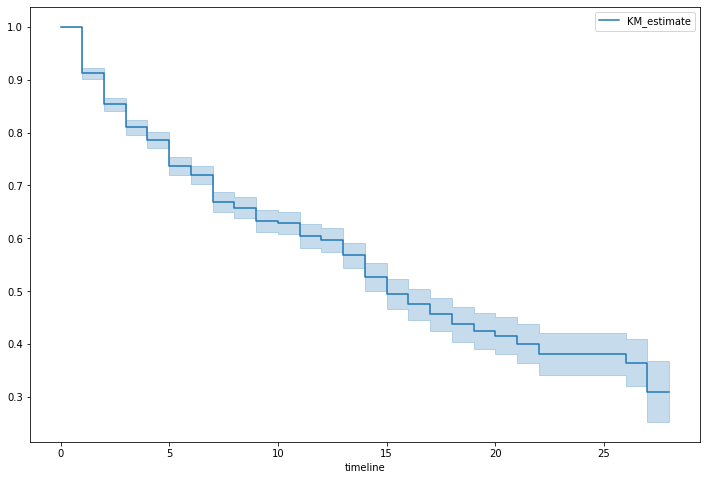

In [19]:
plt.figure(figsize=(12,8))
kmf.plot()
plt.show()

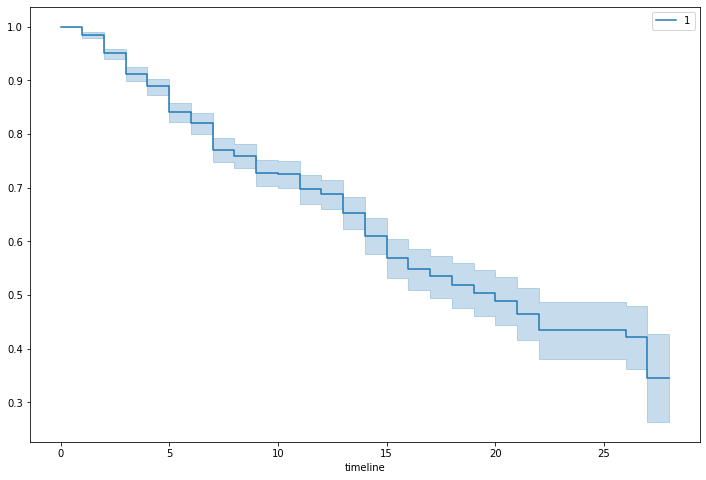

In [21]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
plt.figure(figsize=(12,8))
kmf.fit(T[unemp_data.ui==1], unemp_data.event[unemp_data.ui==1], label='1')
ax = kmf.plot()
plt.show()

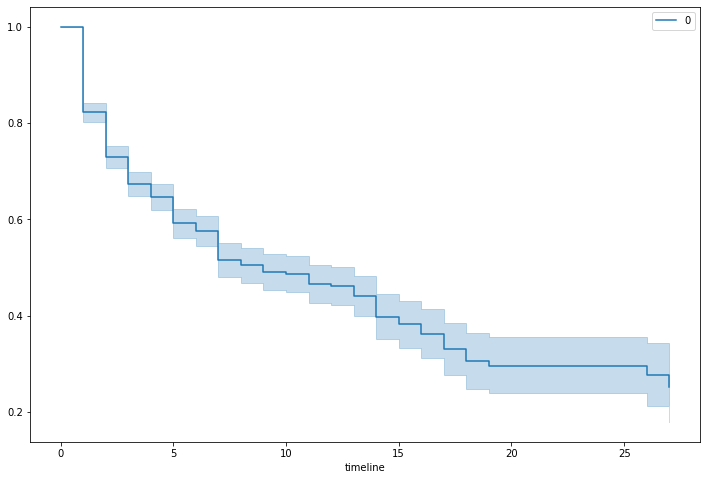

In [29]:
# Applying KaplanMeierFitter model on Time and Events for the group "0"
plt.figure(figsize=(12,8))
kmf.fit(T[unemp_data.ui==0], unemp_data.event[unemp_data.ui==0], label='0')
kmf.plot()
plt.show()
